In [1]:
import numpy as np
#This following is so that this will work with Latex, see
#http://bkanuka.com/articles/native-latex-plots/
import matplotlib as mpl
mpl.use('pgf')

In [2]:
def figsize(scale):                                 # I think scale is the size you want it on the page
    fig_width_pt = 433.62001                        # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.0                        # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

pgf_with_lualatex = {                      # Setup matplotlib to use latex for output
    "pgf.texsystem": "lualatex",           # Change this if using xetex or luatex
    "text.usetex": True,                   # Use LaTeX to write all text
    "pgf.rcfonts": False,
    #Fonts
    "font.family": "serif",                # Get from the pdf font function on the doc
    "font.serif": "Computer Modern Roman",      
    #"font.sans-serif": "Computer Modern Sans serif",
    #"font.serif": [],      
    "font.sans-serif": [],
    "font.monospace": [], # Blank entries should cause plots to inherit fonts from the document
    #Text size
    "font.size": 11,# Document default is 11pt font.
    #"text.fontsize": 11,
    "axes.labelsize": 11,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    ##Axis
    #"axes.labelpad": 2,     # space between label and axis 
    "figure.figsize": figsize(1.0),     # default fig size of 1.0 textwidth
    #Packages
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        r"\usepackage{amsmath}",  #need to add math or the ^ won't work
        r"\usepackage{amssymb}"]
    }

mpl.rcParams.update(pgf_with_lualatex)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from scipy.integrate import quad
from scipy.special import gamma

In [5]:
%matplotlib inline
plt.style.use('seaborn-ticks')
sns.set_palette("muted")

In [10]:
df = pd.read_csv('data/al_a_bias_victoria.csv')

In [11]:
df.head()

,Octant,DD,dDD,Abias,dAbias
0,1,246.313,4.03970,-4.17541,2.01985
1,2,246.678,3.33042,2.21375,1.66521
2,3,291.885,2.89588,-2.69992,1.44794
3,4,305.905,3.09000,-7.56016,1.54500
4,5,300.732,3.56539,-3.66098,1.78269


In [20]:
def ewavg(value, error):
    avg, sow = np.average(value, weights=1/np.square(error), returned=True)
    err = 1.0/np.sqrt(sow)
    return avg, err

def calc_chi2(fit, data, err, dof):
    chi2 = np.sum(np.square(data-fit)/np.square(err))
    return chi2, chi2/dof

def chi2probdistribution(chi2, dof):
    if chi2 > 0:
        num = np.power(chi2,(dof-2.0)/2.0)*np.exp(-chi2/2.0)
        dem = np.power(2.0,(dof/2.0))*gamma(dof/2.0)
        return num/dem
    elif chi2 == 0:
        return 0
    else:
        print('Chi^2 values < 0 not valid!')
        
def calc_chi2prob(chi2, dof):
    return quad(chi2probdistribution, chi2, np.inf, (dof))

In [25]:
dd_avg = ewavg(df.DD, df.dDD)
dd_chi2, dd_rchi2 = calc_chi2(dd_avg[0]*np.ones(8), df.DD, df.dDD, 7)
dd_prob = calc_chi2prob(dd_chi2, 7)

In [26]:
dd_avg, dd_rchi2, dd_prob

((290.5340741541619, 1.17256635095062),
 57.31066633686562,
 (1.3354497226324013e-82, 1.2704676970573683e-83))

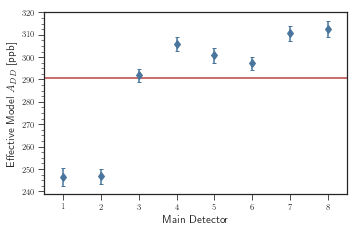

In [36]:
fig, ax = plt.subplots(figsize=figsize(0.9))
ax.errorbar(df.Octant,
            df.DD,
            yerr=df.dDD,
            ls='None',
            marker='d',
            capsize=2,
            capthick=1, 
            barsabove=True,
            color=sns.xkcd_rgb['dull blue'])
ax.plot(np.array([0.5, 8.5]), 
        dd_avg[0]*np.ones(2), 
        ls='-', 
        color=sns.xkcd_rgb['dull red'], zorder=1)
ax.set_xlabel('Main Detector')
ax.set_ylabel('Effective Model $A_{DD}$ [ppb]')
ax.set_xlim(0.5, 8.5)
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
plt.savefig('plots/al_pmt_dd_model.pdf', bbox_inches='tight')
plt.savefig('plots/al_pmt_dd_model.pgf', bbox_inches='tight')
plt.savefig('plots/al_pmt_dd_model.png', bbox_inches='tight')
plt.show()

In [28]:
Ab_avg = ewavg(df.Abias, df.dAbias)
Ab_chi2, Ab_rchi2 = calc_chi2(Ab_avg[0]*np.ones(8), df.Abias, df.dAbias, 7)
Ab_prob = calc_chi2prob(Ab_chi2, 7)

In [29]:
Ab_avg, Ab_rchi2, Ab_prob

((-4.166404238583238, 0.5862833563580863),
 5.061887708647747,
 (9.270971960201095e-06, 1.384294033700317e-08))

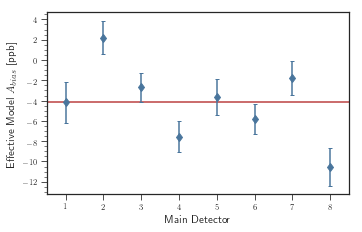

In [35]:
fig, ax = plt.subplots(figsize=figsize(0.9))
ax.errorbar(df.Octant,
            df.Abias,
            yerr=df.dAbias,
            ls='None',
            marker='d',
            capsize=2,
            capthick=1,
            barsabove=True,
            color=sns.xkcd_rgb['dull blue'])
ax.plot(np.array([0.5, 8.5]), 
        Ab_avg[0]*np.ones(2), 
        ls='-', 
        color=sns.xkcd_rgb['dull red'], zorder=1)
ax.set_xlabel('Main Detector')
ax.set_ylabel('Effective Model $A_{bias}$ [ppb]')
ax.set_xlim(0.5, 8.5)
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
plt.savefig('plots/al_abias_model.pdf', bbox_inches='tight')
plt.savefig('plots/al_abias_model.pgf', bbox_inches='tight')
plt.savefig('plots/al_abias_model.png', bbox_inches='tight')
plt.show()